# Questions
* Do people search for international men's day more often around international womenmen's day than the other way round?
* What about transgender day?

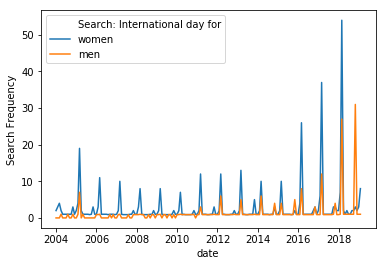

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

men = pd.read_csv('men_day.csv', header=1)[:-1]
women = pd.read_csv('women_day.csv', header=1)[:-1]
both = men.merge(women)

both.columns=('date', 'women', 'men')

def add_day(date_string):
    return date_string + '-01'

both.date = both.date.apply(add_day)

def fix_numbers(frequency):
    """
    Estimate numbers smaller 1 as 0.9
    
    Google provides only integer search frequency and a string of "<1".
    To use this for data analysis, this frequency will be approximated as 0.9 [%].
    """
    if '<1' in str(frequency):
        return 0.9
    return(float(frequency))


for col in ('men', 'women'):
    both[col] = both[col].apply(fix_numbers)
    
both_wide = both.copy()
    
both = pd.melt(both, id_vars=['date'], var_name='Search: International day for', value_name='Search Frequency')

date_data = both.copy()
date_data.date = pd.to_datetime(date_data.date)
sns.lineplot(x='date', y='Search Frequency', hue='Search: International day for', data=date_data)
plt.show()

### Men's day vs Women's day
Ok, so we see that there are two peaks each year, one on men's day (Nov) and one on women's day (March).

But. We have to control for baseline frequency! The imblanance might just be due to more people looking up stuff on women's day, because it is more high-profile.

Let's do an example:

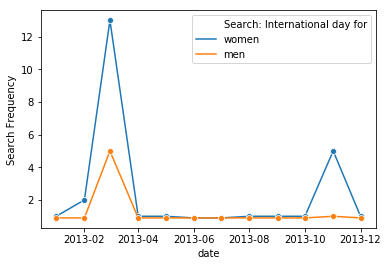

In [79]:
data_2013 = both.loc[both.date.str.contains('2013')].copy()
data_2013.date = pd.to_datetime(data_2013.date)
sns.lineplot(x='date', y='Search Frequency', hue='Search: International day for', data=data_2013, marker='o')
plt.show()

Ok, so in the year 2013, there were indeed more searches for "international men's day" around women's day than around men's day.

For women's day, it was the other way round - more searches for "international women's day" on women's day than on men's day.

So let's define the imbalance factor as the imbalance in searches on the respective international days:

$\begin{aligned}
imbalance~(men) &= \frac{\#searches(men~ day~|~women~ day)}{\#searches(men~ day~|~men~ day)} 
          = \frac{\#searches(men~ day~|~March)}{\#searches(men~ day~|~November)} \\\\
imbalance~(women) &= \frac{\#searches(women~ day~|~men~ day)}{\#searches(women~ day~|~women~ day)}
            = \frac{\#searches(women~ day~|~November)}{\#searches(women~ day~|~March)}
\end{aligned}$

with $ \#searches(men~ day~|~women~ day)$ being the number of searches for "international men's day" around international women's day, i.e., during November.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


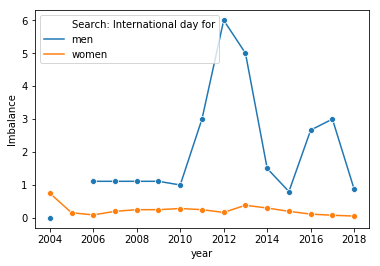

In [78]:
imbalance = pd.DataFrame(columns=['year', 'Search: International day for', 'imbalance_ratio'])

for year in range(2004, 2019):
    data_year = both_wide.loc[both_wide.date.str.contains(str(year))].copy()
    mar = data_year[both_wide.date.str.contains('-03-')]
    nov = data_year[both_wide.date.str.contains('-11-')]
    imbalance_men = mar.men.values[0] / nov.men.values[0]
    imbalance_women = nov.women.values[0] / mar.women.values[0]
    
    df = pd.DataFrame({'Search: International day for': ['men', 'women'], 'Imbalance': [imbalance_men, imbalance_women], 'year': [year, year]})
    imbalance = pd.concat([df, imbalance], sort=True)
    
imbalance = imbalance[['year', 'Search: International day for', 'Imbalance']]
sns.lineplot(x='year', y='Imbalance', hue='Search: International day for', data=imbalance, marker='o')
plt.show()

Ok, so the trend holds: except for 2004, the ratio $imbalance~(men)$ was substantially greater than the ratio $imbalance~(women)$. For the year 2005, Google tells us that there was a (probably rounded) frequency of 0 of searches for men's day in November, so our ratio is actually $+ \infty$ there. For 2006-2009, we only know that this search frequency was smaller than 1%, which is conservatively estimated as 0.9% here.

### Transgender Day
So, what about a day for trans people?
There actually is one, on 20 November. It is called "International Transgender Day of Visibility", Google Trends provide weirdly noisy data for this search. "International Transgender Day" is better, "Transgender Day" seems to be what we are looking for.

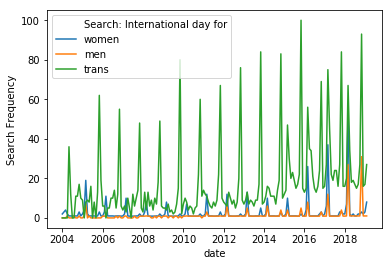

In [76]:
men = pd.read_csv('men_day.csv', header=1)[:-1]
women = pd.read_csv('women_day.csv', header=1)[:-1]
trans = pd.read_csv('transgender_day.csv', header=1)[:-1]

ternary = men.merge(women).merge(trans)
ternary.columns=('date', 'women', 'men', 'trans')

ternary.date = ternary.date.apply(add_day)

for col in ('men', 'women', 'trans'):
    ternary[col] = ternary[col].apply(fix_numbers)

ternary_wide = ternary.copy()

ternary = pd.melt(ternary, id_vars=['date'], var_name='Search: International day for', value_name='Search Frequency')
ternary['Search Frequency'] = ternary['Search Frequency'].apply(fix_numbers)

ternary_date = ternary.copy()
ternary_date.date = pd.to_datetime(ternary_date.date)
sns.lineplot(x='date', y='Search Frequency', hue='Search: International day for', data=ternary_date)
plt.show()

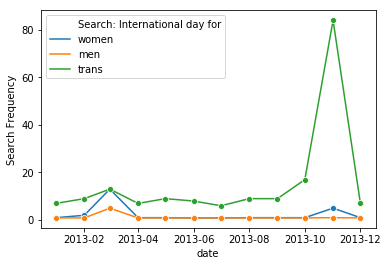

In [77]:
data_2013 = ternary.loc[ternary.date.str.contains('2013')].copy()
data_2013.date = pd.to_datetime(data_2013.date)
sns.lineplot(x='date', y='Search Frequency', hue='Search: International day for', data=data_2013, marker='o')
plt.show()

Ok, there seems to be a similar seasonality in searches for Trans Day. Let's calculate Imbalance Factors!

Technical note:
Absolute frequencies are not meaningful, as they are normalized to their highest value (=100). Exporting both women's day and men's day at the same time results in a complete loss of resolution for the men's day values :/ 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


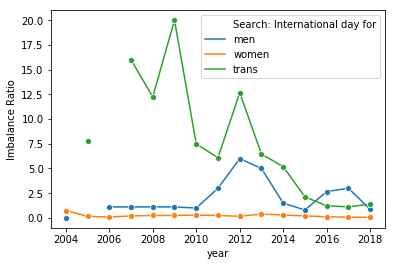

In [70]:
imbalance = pd.DataFrame(columns=['year', 'gender', 'imbalance_ratio'])

for year in range(2004, 2019):
    data_year = ternary_wide.loc[ternary_wide.date.str.contains(str(year))].copy()
    mar = data_year[data_year.date.str.contains('-03-')]
    nov = data_year[data_year.date.str.contains('-11-')]
    
    imbalance_men = mar.men.values[0] / nov.men.values[0]
    imbalance_women = nov.women.values[0] / mar.women.values[0]
    imbalance_trans = nov.trans.values[0] / mar.trans.values[0]

    
    df = pd.DataFrame({'Search: International day for': ['men', 'women', 'trans'], 'Imbalance Ratio': [imbalance_men, imbalance_women, imbalance_trans],
                       'year': [year, year, year]})
    imbalance = pd.concat([df, imbalance], sort=True)
    
imbalance = imbalance[['year', 'Search: International day for', 'Imbalance Ratio']]
sns.lineplot(x='year', y='Imbalance Ratio', hue='Search: International day for', data=imbalance, marker='o')
plt.show()

Alright! It seems like even more people google for 'International Transgender Day' on men's day than people google for 'International Men's Day' on women's day (relative to their baselines).

### Interpretation
One explanation is that people are unsatisfied with how high-profile the respective days of various genders are. I.e., women's day seems to be super high-profile, as seen in total search frequencies:


/home/lee/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


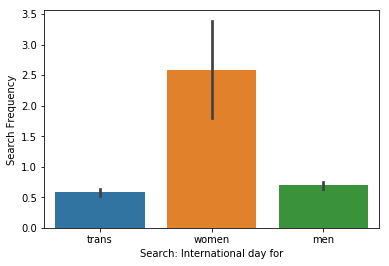

In [96]:
mfd = pd.read_csv('mfd.csv', header=1)[:-1]

mfd.columns=('date', 'trans', 'women', 'men')
mfd.date = both.date.apply(add_day)
for col in ('men', 'women', 'trans'):
    mfd[col] = mfd[col].apply(fix_numbers)
    
long_mfd = pd.melt(mfd, id_vars=['date'], var_name='Search: International day for', value_name='Search Frequency')
sns.barplot(x='Search: International day for', y='Search Frequency', data=long_mfd)
plt.show()

Which becomes even more extreme if we use a less conserative estimate for the "<1" bin:

/home/lee/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


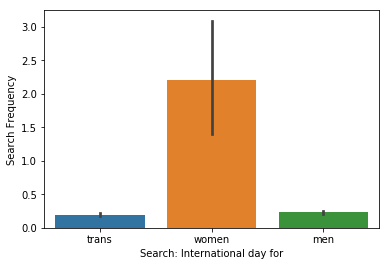

In [100]:
def fix_numbers(frequency):
    """
    Estimate numbers smaller 1 as 0.9
    
    Google provides only integer search frequency and a string of "<1".
    To use this for data analysis, this frequency will be approximated as 0.9 [%].
    """
    if '<1' in str(frequency):
        return 0.3
    return(float(frequency))

mfd = pd.read_csv('mfd.csv', header=1)[:-1]

mfd.columns=('date', 'trans', 'women', 'men')
mfd.date = both.date.apply(add_day)
for col in ('men', 'women', 'trans'):
    mfd[col] = mfd[col].apply(fix_numbers)
    
long_mfd = pd.melt(mfd, id_vars=['date'], var_name='Search: International day for', value_name='Search Frequency')
sns.barplot(x='Search: International day for', y='Search Frequency', data=long_mfd)
plt.show()

The basic point stands, that women's day is much more high-profile than men's or transgender's days, and this is a plausible explanation for the observed search behavior.